#### Importing the required libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

#### Reading the Data

In [3]:
heart_data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
heart_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Summary of the Data

##### Meta Data of the Features/Columns in the Dataset

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
  heart_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Data Pre-Processing

##### Checking for Null Values in the Dataset

In [6]:
heart_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### Analyzing the BMI Data

##### On finding the data for bmi on the internet we found that there are people with bmi as low as 6.7 kg/m2 to as high as 180 kg/m2

##### Hence we dont consider them as outliers

##### Filling Null values for the BMI column with its mean

In [7]:
bmi_median = heart_data['bmi'].median()
bmi_median

28.1

In [8]:
heart_data['bmi'].fillna(bmi_median, inplace=True)

##### Null Values Resolved

In [9]:
heart_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##### ID column is not needed for describing the dataset. Hence dropping it.

In [10]:
heart_data.drop('id', axis=1, inplace=True)

In [11]:
heart_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
pre_processed_heart_data = heart_data.copy()
pre_processed_heart_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
pre_processed_heart_data.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1, inplace=True)
pre_processed_heart_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


In [14]:
label_converter = LabelEncoder()

##### Gender Data Mapping

In [15]:
pre_processed_heart_data['gender'] = label_converter.fit_transform(heart_data['gender'])

In [16]:
heart_data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [17]:
  pre_processed_heart_data['gender'].value_counts()

gender
0    2994
1    2115
2       1
Name: count, dtype: int64

##### Married Data Mapping

In [18]:
pre_processed_heart_data['ever_married'] = label_converter.fit_transform(heart_data['ever_married'])

In [19]:
pre_processed_heart_data['ever_married'].value_counts()

ever_married
1    3353
0    1757
Name: count, dtype: int64

In [20]:
heart_data['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

##### Work Type Mapping

In [22]:
pre_processed_heart_data['work_type'] = label_converter.fit_transform(heart_data['work_type'])

In [23]:
pre_processed_heart_data['work_type'].value_counts()

work_type
2    2925
3     819
4     687
0     657
1      22
Name: count, dtype: int64

In [24]:
heart_data['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence Type Mapping

In [25]:
pre_processed_heart_data['Residence_type'] = label_converter.fit_transform(heart_data['Residence_type'])

In [26]:
pre_processed_heart_data['Residence_type'].value_counts()

Residence_type
1    2596
0    2514
Name: count, dtype: int64

In [27]:
heart_data['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

##### Smoking Status Mapping

In [28]:
pre_processed_heart_data['smoking_status'] = label_converter.fit_transform(heart_data['smoking_status'])

In [29]:
pre_processed_heart_data['smoking_status'].value_counts()

smoking_status
2    1892
0    1544
1     885
3     789
Name: count, dtype: int64

In [30]:
heart_data['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

##### Final Pre-Processed and Encoded Data

In [31]:
pre_processed_heart_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
1,61.0,0,0,202.21,28.1,1,0,1,3,0,2
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2


### Exploratory Data Analysis

#### Analyzing the Age Data

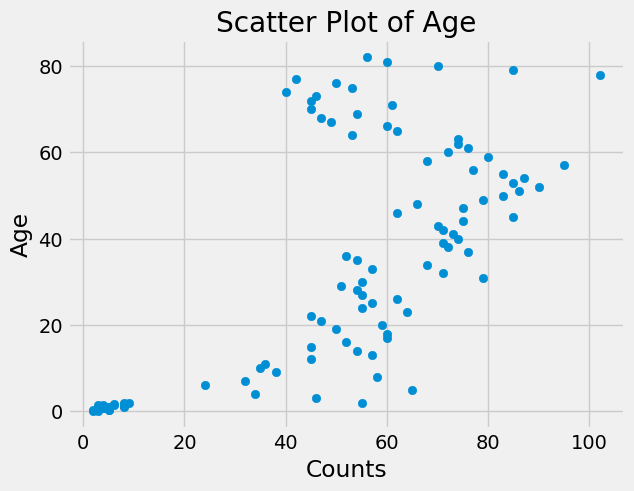

In [32]:
ageData = pre_processed_heart_data['age'].value_counts()
plt.scatter(ageData.values, ageData.index)
plt.xlabel('Counts')
plt.ylabel('Age')
plt.title('Scatter Plot of Age')

plt.show()

#### Analyzing Hypertension Data

Text(0.5, 0, 'Counts')

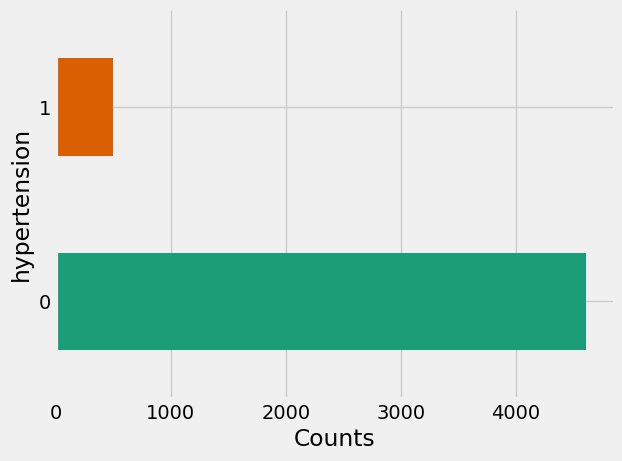

In [33]:
pre_processed_heart_data.groupby('hypertension').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Counts')

#### Analyzing Heart Disease

Text(0.5, 0, 'Counts')

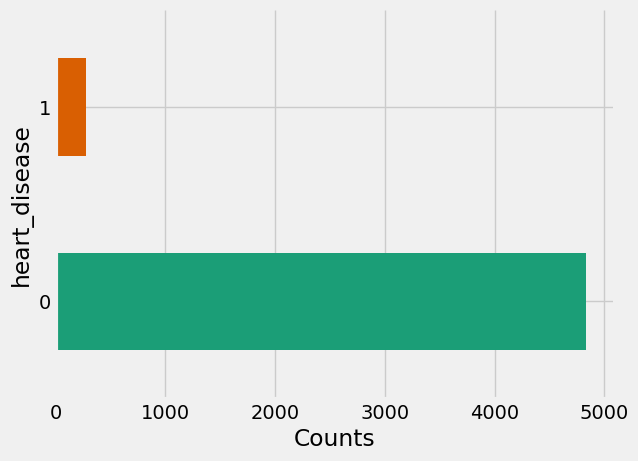

In [34]:
pre_processed_heart_data.groupby('heart_disease').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Counts')

#### Analyzing Stroke Data

Text(0.5, 0, 'Counts')

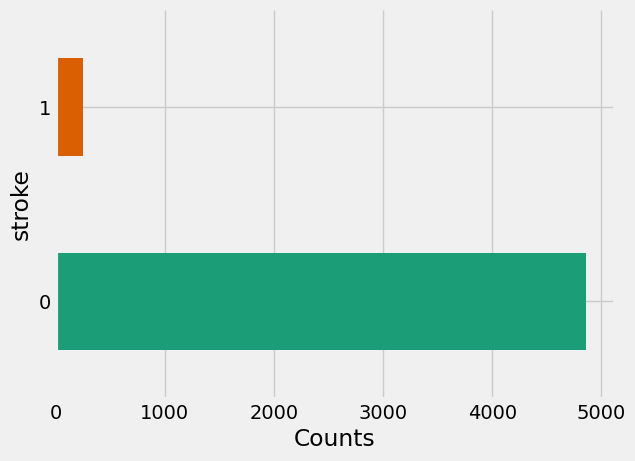

In [35]:
pre_processed_heart_data.groupby('stroke').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Counts')

#### Analyzing Gender Data

Text(0.5, 0, 'Counts')

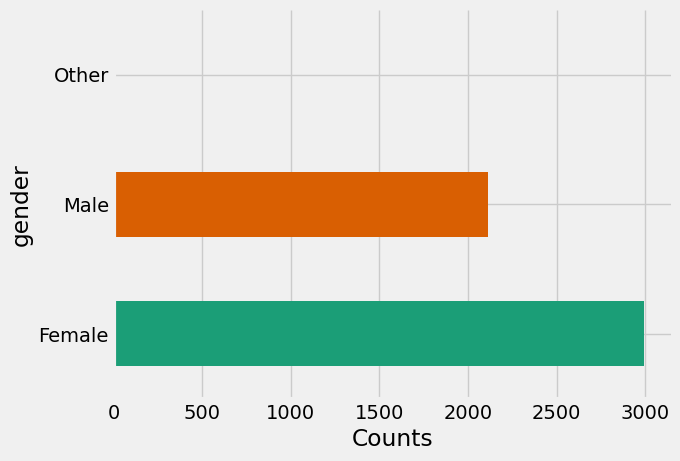

In [36]:
heart_data.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Counts')

#### Analyzing Ever Married Data

Text(0.5, 0, 'Counts')

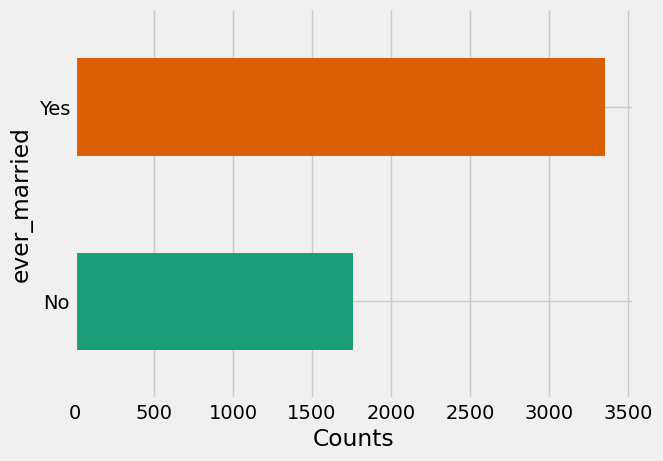

In [37]:
heart_data.groupby('ever_married').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Counts')

#### Analyzing Work Type Data

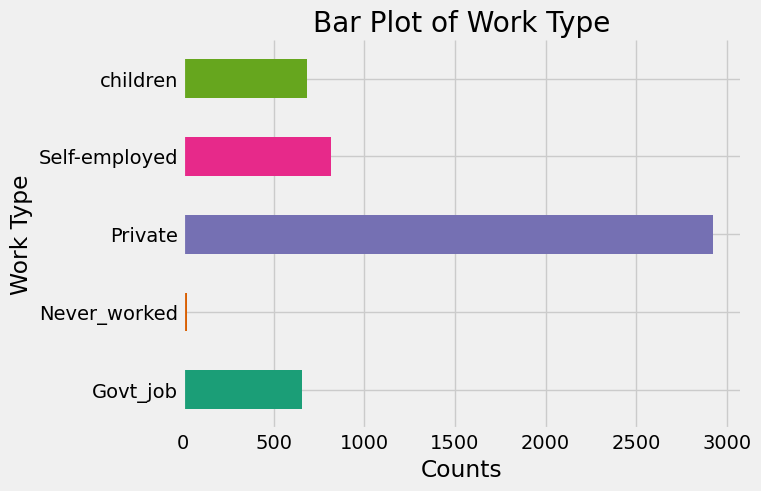

In [38]:
heart_data.groupby('work_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Counts')
plt.ylabel('Work Type')
plt.title('Bar Plot of Work Type')

plt.show()

#### Analyzing Residence Data

Text(0.5, 0, 'Counts')

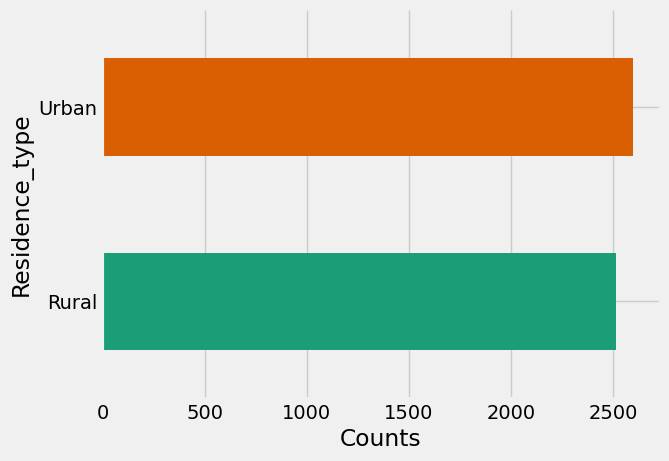

In [39]:
heart_data.groupby('Residence_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Counts')

#### Analyzing Smoking Status

Text(0.5, 0, 'Counts')

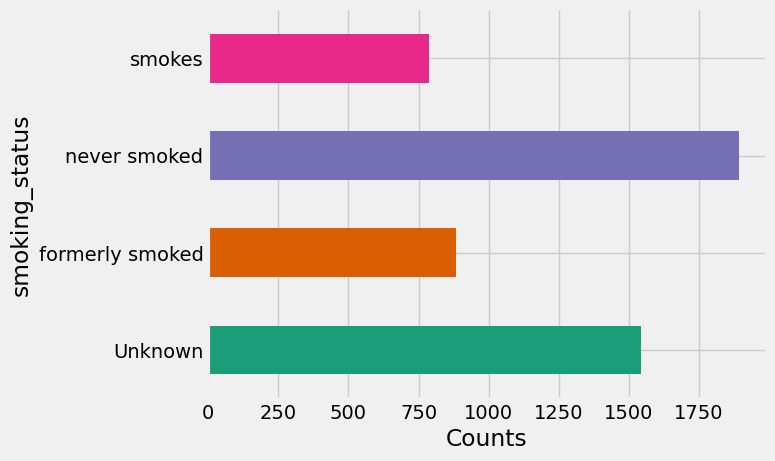

In [40]:
heart_data.groupby('smoking_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Counts')

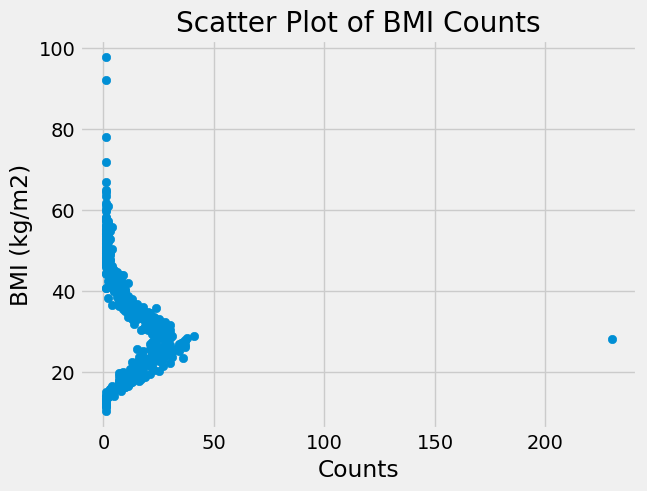

In [41]:
bmi_counts = heart_data['bmi'].value_counts()

plt.scatter(bmi_counts.values, bmi_counts.index)
plt.xlabel('Counts')
plt.ylabel('BMI (kg/m2)')
plt.title('Scatter Plot of BMI Counts')

plt.show()

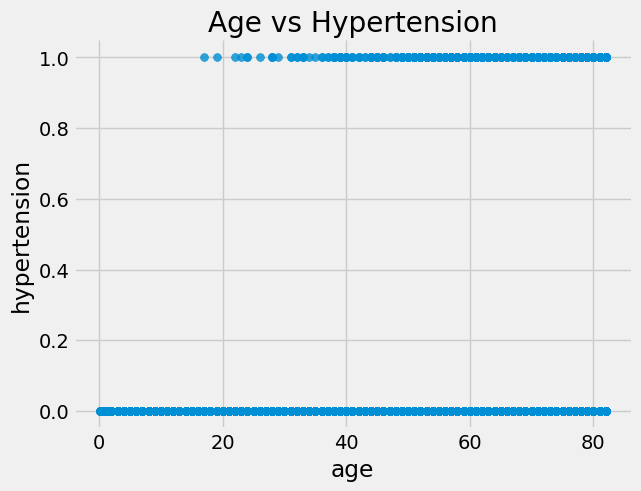

In [42]:
# @title age vs hypertension

from matplotlib import pyplot as plt
pre_processed_heart_data.plot(kind='scatter', x='age', y='hypertension', s=32, alpha=.8)
plt.title('Age vs Hypertension')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [43]:
heart_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


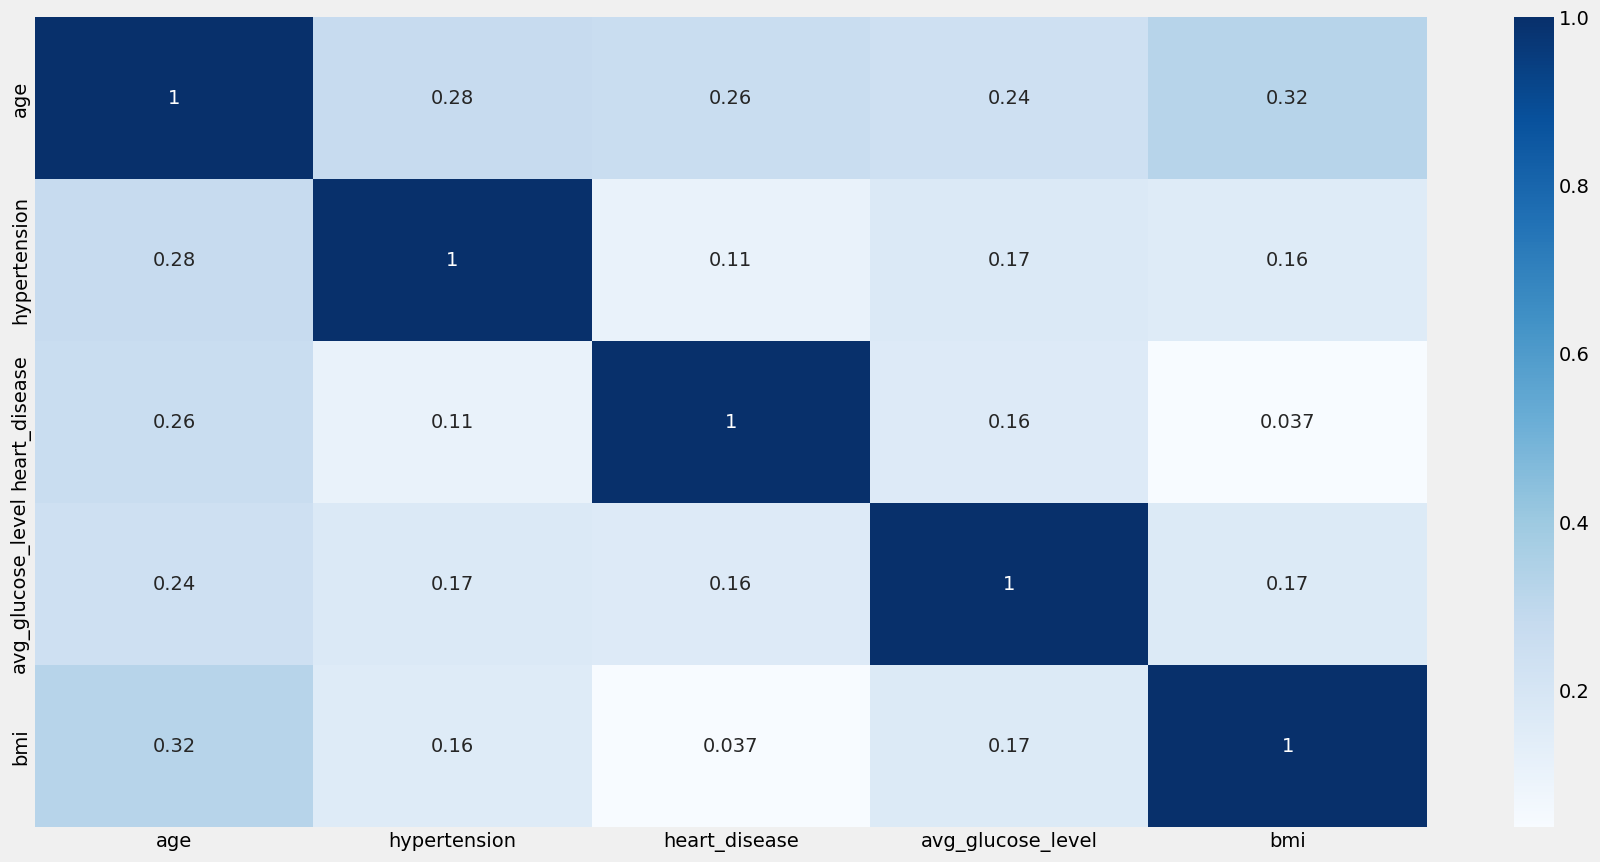

In [44]:
corr = heart_data.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke'], axis=True).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

**Splitting the Data**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [46]:
X = pre_processed_heart_data.drop('stroke', axis=1)
y = pre_processed_heart_data['stroke']

# Specify train_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 **Fixing Class Imbalance**

In [47]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [51]:
y_pred = logistic_regression.predict(X_test)

In [55]:
from sklearn.metrics import classification_report
import numpy as np


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       960
           1       0.17      0.76      0.28        62

    accuracy                           0.76      1022
   macro avg       0.57      0.76      0.57      1022
weighted avg       0.93      0.76      0.82      1022



**Creating Confusion Matrix**

In [58]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)


Confusion Matrix:
 [[729 231]
 [ 15  47]]


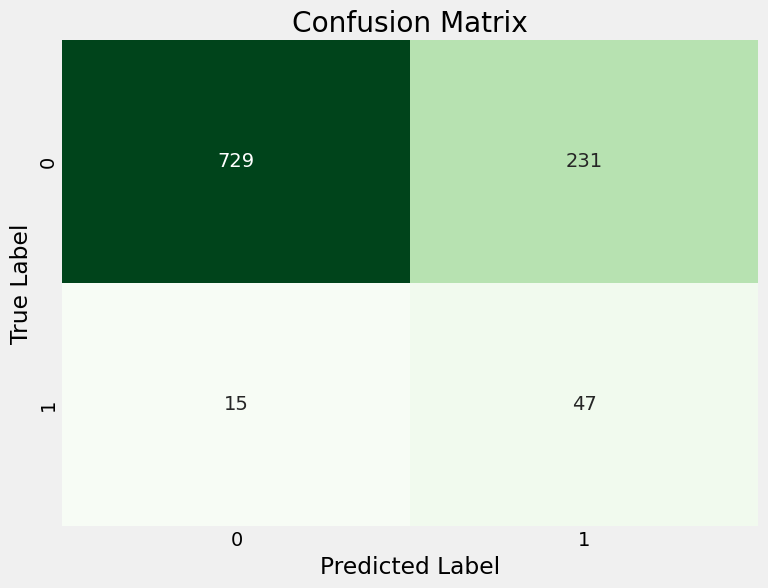

In [59]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix)

**Logistic Regression after HyperParameters Tuning**

In [60]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn import svm

In [67]:
rs_LRG = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions={
        'C': np.logspace(-4, 4, 20),  # Regularization strength
        'penalty': ['l1', 'l2'],  # The norm used in penalization
        'solver': ['liblinear', 'saga'],  # Algorithm to use in the optimization problem
        'class_weight': [None, 'balanced'],  # Weights associated with classes
        'max_iter': [100, 200, 300]  # Maximum number of iterations taken for the solvers to converge
    },
    cv=5,
    return_train_score=True,
    n_iter=4
)

In [68]:
rs_LRG.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=4,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   return_train_score=True)

In [69]:
best_params = rs_LRG.best_params_
best_model = rs_LRG.best_estimator_

In [70]:
y_pred_LRG = best_model.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred_LRG))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       960
           1       0.17      0.76      0.28        62

    accuracy                           0.76      1022
   macro avg       0.57      0.76      0.57      1022
weighted avg       0.93      0.76      0.82      1022



In [66]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_LRG)
print("Confusion Matrix:\n", conf_matrix)

FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)


Confusion Matrix:
 [[844 116]
 [ 46  16]]


##### **Decision Tree**



In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=40)
decision_tree.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=40)

In [90]:
y_pred_dt = decision_tree.predict(X_test)

In [91]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       960
           1       0.14      0.16      0.15        62

    accuracy                           0.89      1022
   macro avg       0.54      0.55      0.55      1022
weighted avg       0.90      0.89      0.89      1022



In [101]:
rs_DT = rs_DTC = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions={
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 4, 6, 8],
        'max_features': [None, 'auto', 'sqrt', 'log2'],
        'criterion': ['gini', 'entropy'],
    },
    cv=5,
    return_train_score=False,
    n_iter=2
)

In [102]:
rs_DT.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              20]})

In [103]:
best_params = rs_DT.best_params_
best_model = rs_DT.best_estimator_

In [104]:
y_pred_DT = best_model.predict(X_test)

In [105]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       960
           1       0.15      0.23      0.18        62

    accuracy                           0.87      1022
   macro avg       0.55      0.57      0.56      1022
weighted avg       0.90      0.87      0.89      1022



Confusion Matrix:
 [[900  60]
 [ 52  10]]


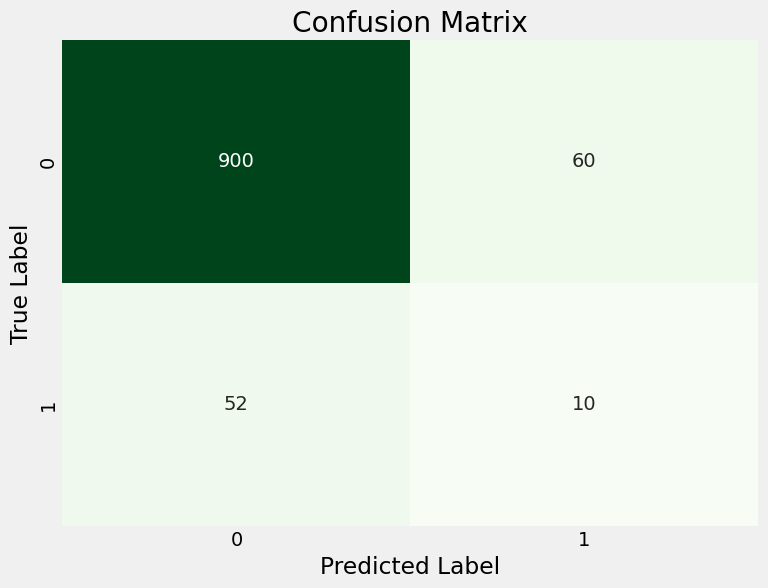

In [99]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix)

FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)

def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix)


In [ ]:
dt_feature_importance = decision_tree.feature_importances_
dt_feature_names = X.columns

In [ ]:
dt_feature_importance_df = pd.DataFrame({
    'Feature Name': dt_feature_names,
    'Importance Score': dt_feature_importance
})

dt_feature_importance_df

,Feature Name,Importance Score
0,age,0.487182
1,hypertension,0.012540
2,heart_disease,0.010512
3,avg_glucose_level,0.123232
4,bmi,0.093872
5,gender,0.030799
6,ever_married,0.012162
7,work_type,0.132262
8,Residence_type,0.019046
9,smoking_status,0.078394


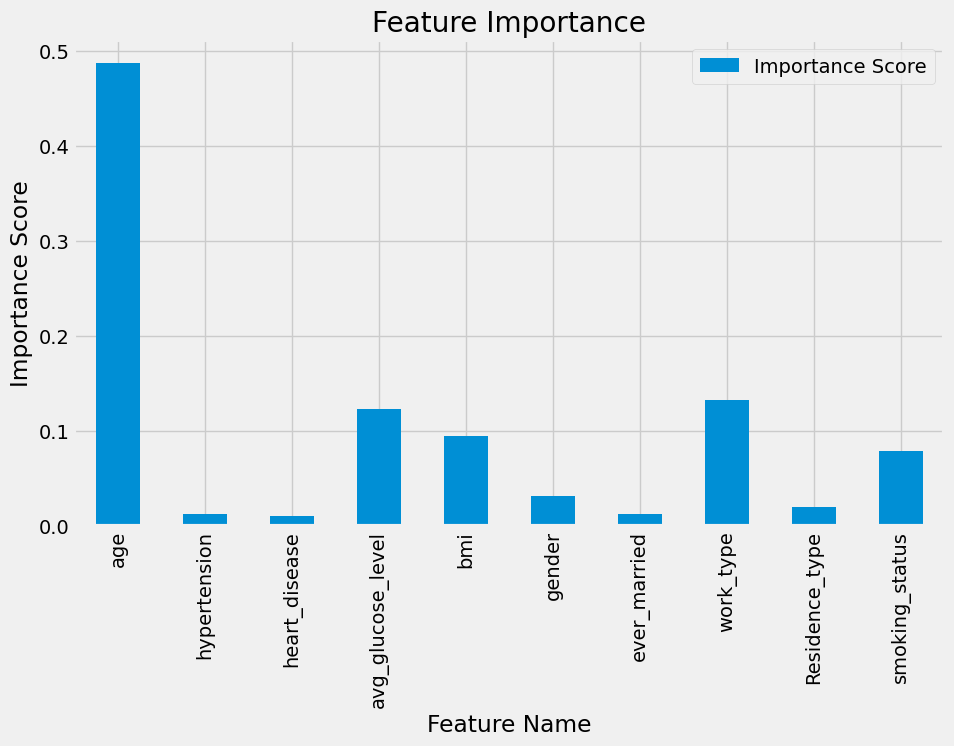

In [ ]:
dt_feature_importance_df.plot(kind='bar', x='Feature Name', y='Importance Score', figsize=(10, 6))

plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')

plt.show()

**Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
random_forest = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=40)

In [75]:
random_forest.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=40)

In [76]:
y_pred_rf = random_forest.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.21      0.11      0.15        62

    accuracy                           0.92      1022
   macro avg       0.58      0.54      0.55      1022
weighted avg       0.90      0.92      0.91      1022



HyperParameter Tuning

In [78]:
rs_RF = RandomizedSearchCV(
   estimator=RandomForestClassifier(),
    param_distributions={
        'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
        'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
        'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
        'bootstrap': [True, False]  # Method of selecting samples for training each tree
    },
  cv=5,  # 5-fold cross-validation
    return_train_score=True,
    n_iter=10,  # Number of parameter settings that are sampled
    random_state=42
)

In [79]:

rs_RF.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, return_train_score=True)

In [80]:
best_params = rs_RF.best_params_
best_model = rs_RF.best_estimator_

In [81]:

y_pred_RF = best_model.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.18      0.10      0.13        62

    accuracy                           0.92      1022
   macro avg       0.56      0.53      0.54      1022
weighted avg       0.90      0.92      0.91      1022



Confusion Matrix:
 [[933  27]
 [ 56   6]]


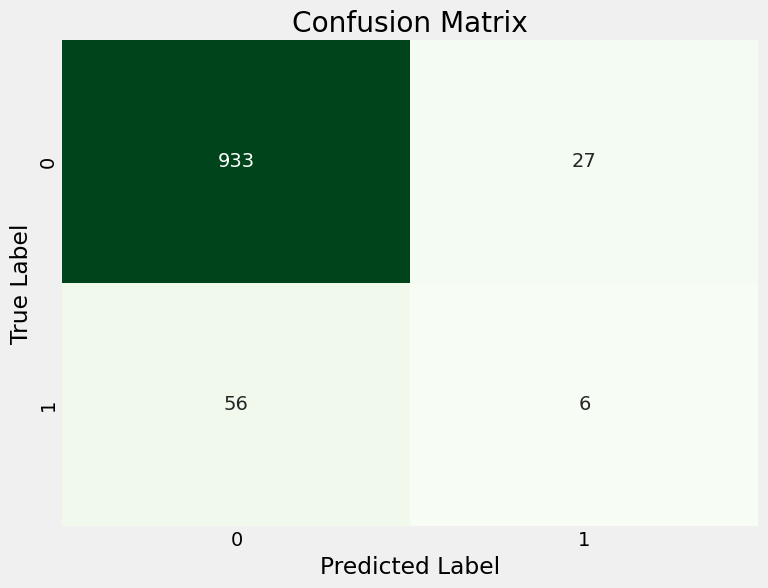

In [86]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix:\n", conf_matrix)

FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)

def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix)

In [ ]:
rf_feature_importance = random_forest.feature_importances_
rf_feature_names = X.columns

In [ ]:
rf_feature_importance_df = pd.DataFrame({
    'Feature Name': rf_feature_names,
    'Importance Score': rf_feature_importance
})

rf_feature_importance_df

,Feature Name,Importance Score
0,age,0.341185
1,hypertension,0.019453
2,heart_disease,0.015247
3,avg_glucose_level,0.141495
4,bmi,0.128076
5,gender,0.031826
6,ever_married,0.047995
7,work_type,0.122702
8,Residence_type,0.031078
9,smoking_status,0.120942


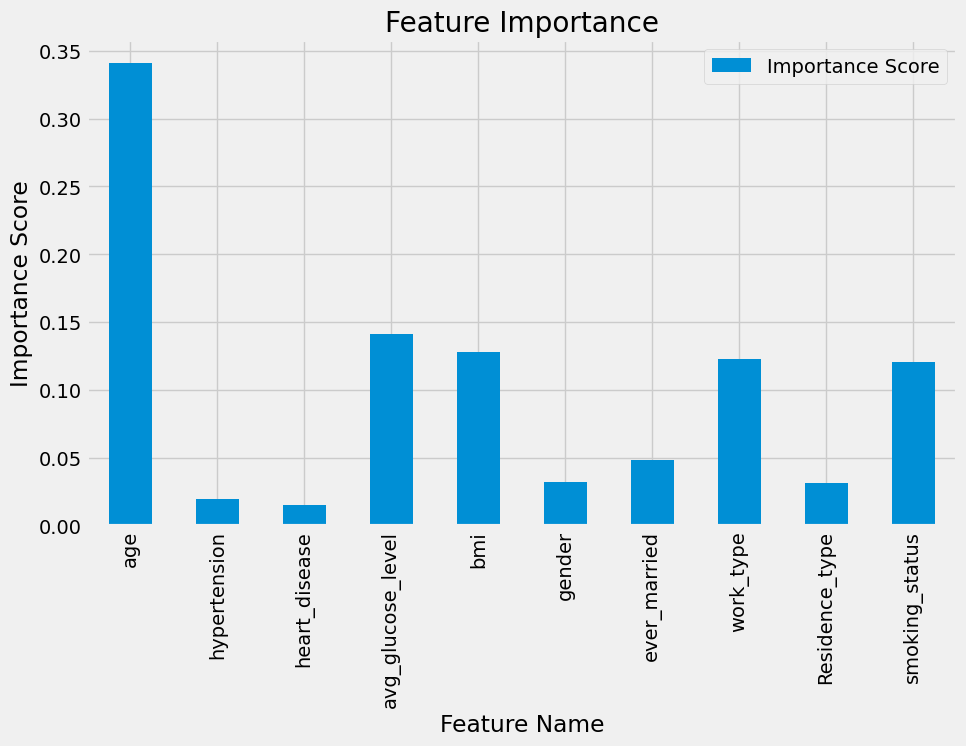

In [ ]:
rf_feature_importance_df.plot(kind='bar', x='Feature Name', y='Importance Score', figsize=(10, 6))

plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')

plt.show()

**SVM**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
rs_svm = RandomizedSearchCV(
    estimator = SVC(gamma='auto'),
    param_distributions={
        'C': [100],
        'kernel': ['rbf', 'linear','poly', 'sigmoid']
    },
    cv=5,
    return_train_score=False,
    n_iter=2
)

In [ ]:
rs_svm.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=2,
                   param_distributions={'C': [100],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']})

In [ ]:
pd.DataFrame(rs_svm.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,100,sigmoid,0.691618
1,100,poly,0.848373


In [ ]:
best_params = rs_svm.best_params_
best_model = rs_svm.best_estimator_

In [ ]:
y_pred_svm = best_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       960
           1       0.12      0.26      0.16        62

    accuracy                           0.84      1022
   macro avg       0.53      0.57      0.54      1022
weighted avg       0.90      0.84      0.87      1022



XGBoost


In [63]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [69]:
scale_pos_weight = np.sum(y_train_smote == 0) / np.sum(y_train_smote == 1)

rs_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(scale_pos_weight=scale_pos_weight),
    param_distributions={
        'max_depth': [3, 4, 5, 6],
        'min_child_weight': [1, 2, 3, 4],
        'gamma': [i/10.0 for i in range(3)],
        'subsample': [0.6, 0.7, 0.8, 0.9],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    cv=5,
    return_train_score=False,
    n_iter=12,

)
rs_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=12,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]})

In [73]:
xgb_best_params = rs_xgb.best_params_
xgb_best_model = rs_xgb.best_estimator_

In [74]:
y_pred_xgb = xgb_best_model.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.15      0.08      0.11        62

    accuracy                           0.92      1022
   macro avg       0.55      0.53      0.53      1022
weighted avg       0.89      0.92      0.90      1022



Confusion Matrix:
 [[932  28]
 [ 57   5]]


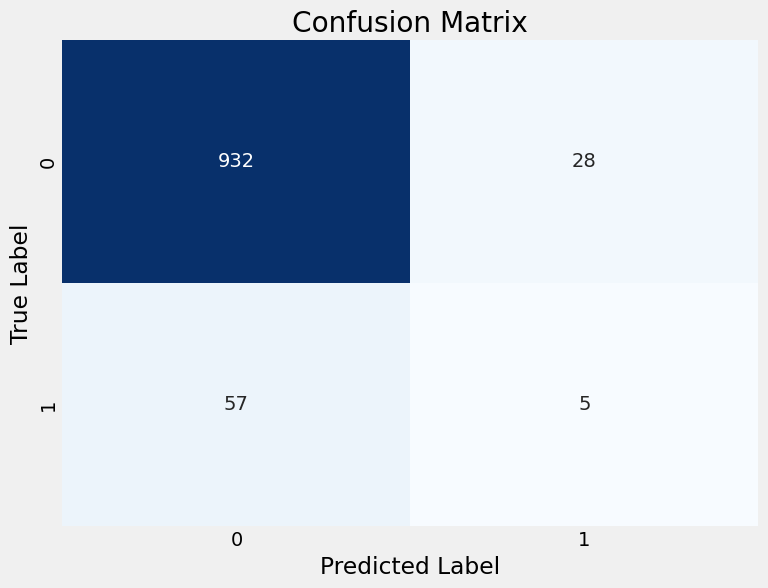

In [87]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", conf_matrix)

FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)

def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix)


catboost

In [76]:
!pip install catboost
from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.5 MB/s eta 0:00:00


In [79]:
rs_catb = RandomizedSearchCV(
    estimator=CatBoostClassifier(),
    param_distributions={
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
        'depth': [4, 5, 6, 7, 8],
        'l2_leaf_reg': [1, 3, 5, 10],
        'border_count': [32, 64, 128, 255],
        'scale_pos_weight': [1, 5, 10, 20]
    },
    cv=5,
    scoring='precision',  # Focusing on precision scoring
    return_train_score=False,
    n_iter=20,
    random_state=42,
    verbose=2
)

rs_catb.fit(X_train_smote, y_train_smote)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.1961370	total: 67.4ms	remaining: 13.4s
5:	learn: 0.1775310	total: 80.1ms	remaining: 13.3s
6:	learn: 0.1621718	total: 101ms	remaining: 14.3s
7:	learn: 0.1528637	total: 108ms	remaining: 13.4s
8:	learn: 0.1422407	total: 121ms	remaining: 13.3s
9:	learn: 0.1299530	total: 137ms	remaining: 13.6s
10:	learn: 0.1266588	total: 150ms	remaining: 13.5s
11:	learn: 0.1215143	total: 156ms	remaining: 12.8s
12:	learn: 0.1182122	total: 164ms	remaining: 12.5s
13:	learn: 0.1093854	total: 171ms	remaining: 12.1s
14:	learn: 0.1044317	total: 178ms	remaining: 11.7s
15:	learn: 0.1013121	total: 185ms	remaining: 11.4s
16:	learn: 0.0999595	total: 193ms	remaining: 11.1s
17:	learn: 0.0979444	total: 209ms	remaining: 11.4s
18:	learn: 0.0965740	total: 226ms	remaining: 11.7s
19:	learn: 0.0935047	total: 242ms	remaining: 11.8s
20:	learn: 0.0909840	total: 250ms	remaining: 11.7s
21:	learn: 0.0889576	total: 260ms	remaining: 11.5s
22:	learn: 0.0873522	total: 267ms	r

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x78cabaf2fbb0>,
                   n_iter=20,
                   param_distributions={'border_count': [32, 64, 128, 255],
                                        'depth': [4, 5, 6, 7, 8],
                                        'l2_leaf_reg': [1, 3, 5, 10],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'scale_pos_weight': [1, 5, 10, 20]},
                   random_state=42, scoring='precision', verbose=2)

In [80]:
catb_best_params = rs_catb.best_params_
catb_best_model = rs_catb.best_estimator_

In [81]:
y_pred_catb = catb_best_model.predict(X_test)

In [83]:
print(classification_report(y_test, y_pred_catb))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.12      0.05      0.07        62

    accuracy                           0.92      1022
   macro avg       0.53      0.51      0.51      1022
weighted avg       0.89      0.92      0.90      1022



Confusion Matrix:
 [[937  23]
 [ 59   3]]


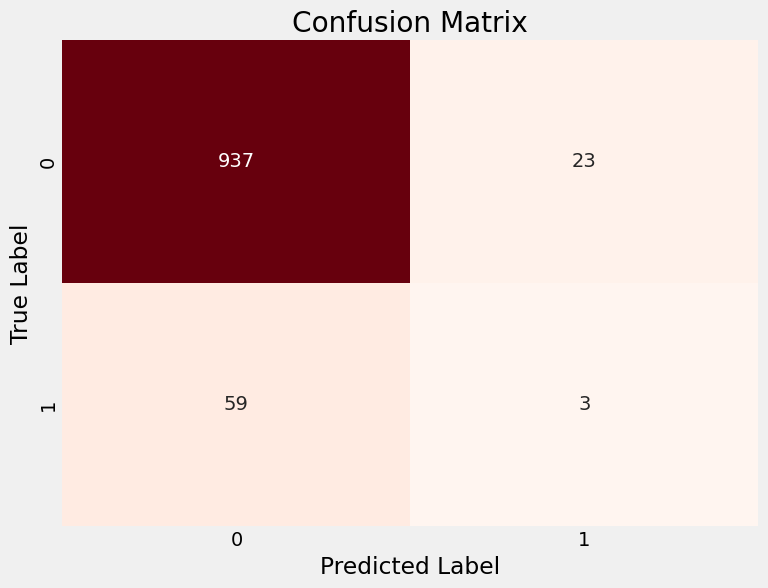

In [86]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_catb)
print("Confusion Matrix:\n", conf_matrix)

FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)

def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix)
